In [ ]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99

     |████████████████████████████████| 80 kB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=be3dddcd812278b7356fe3e6587f5498966e99f14934fcc62696b9ab92968544
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=242d209a05957c47d18278f03235f5a6f6b3778777bd77ac134b3008b764c6d9
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
--2021-09-29 23:01:08--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133

In [ ]:
#MELOAD DATA

df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
C = df['species'].values
print(X.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


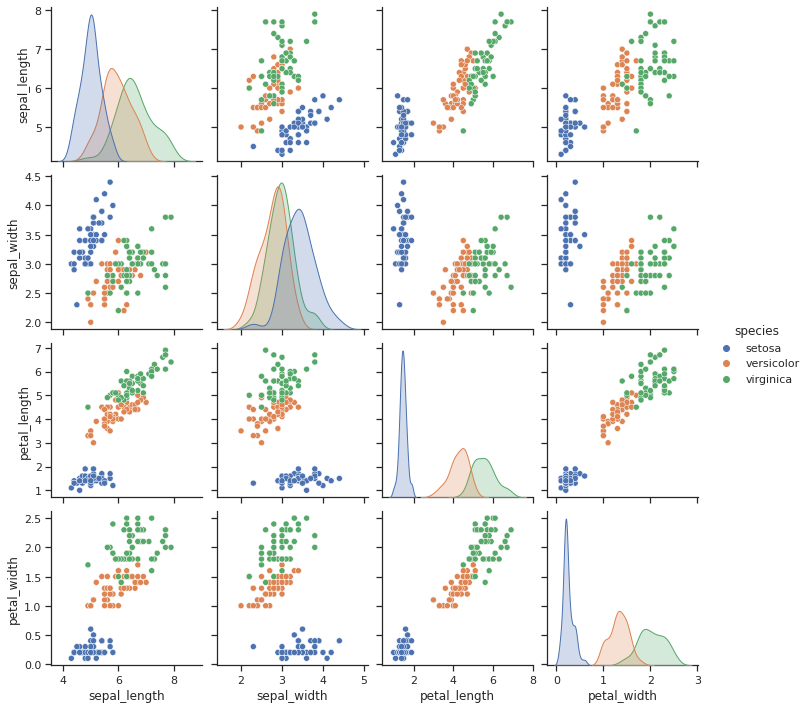

In [ ]:
g = sns.pairplot(df, hue="species")

In [ ]:
#MENGHAPUS "random_state = random_state" JIKA INGIN MELIHAT EFEK RANDOMIZED CENTROID

k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=-1, precompute_distances='auto', random_state=99,
       tol=0.0001, verbose=0)

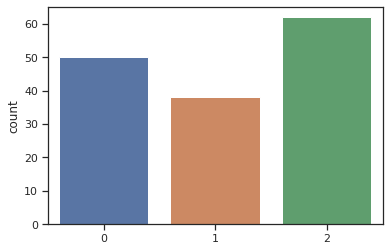

In [ ]:
#HASIL CLUSTERING

C_km = km.predict(X)
p= sns.countplot(C_km)

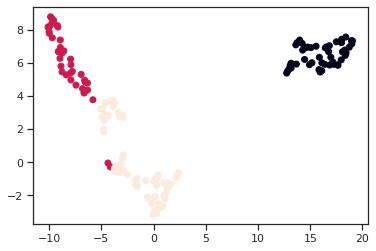

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

Text(0.5, 1.0, 'Elbow curve')

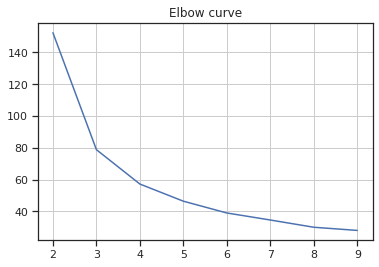

In [ ]:
#ELBOW METHOD

distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

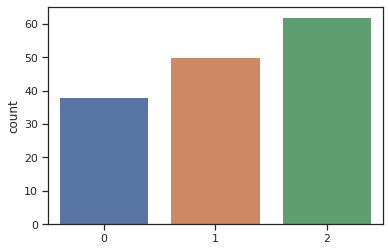

In [ ]:
#K-MEANS++ CLUSTERING

k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]

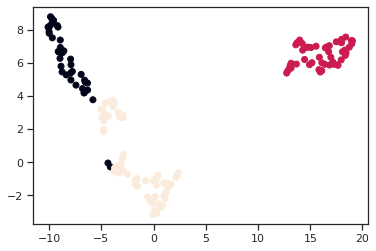

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

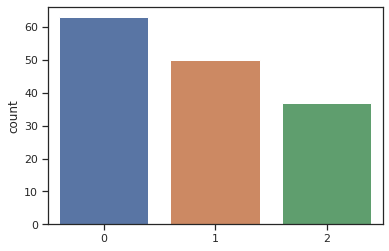

In [ ]:
#MINI BATCH K-MEANS

mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state)
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

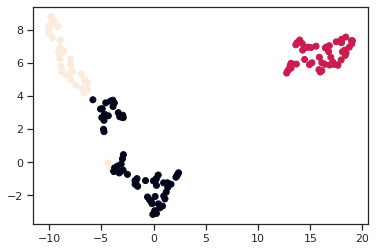

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

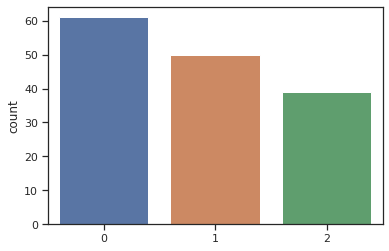

In [ ]:
#MINI BATCH K-MEANS++

mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

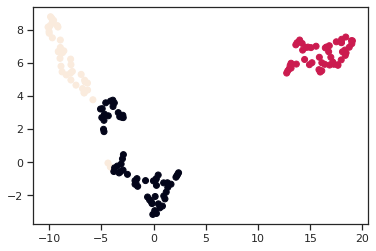

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()

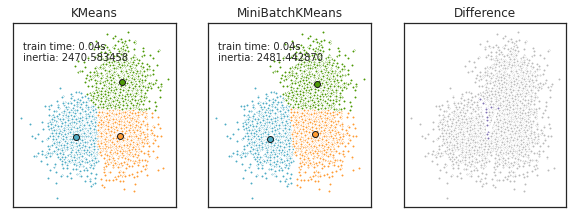

In [ ]:
#K-MEANS VS MINIBATCH K-MEANS

tau.km_vs_mbkm()

In [ ]:
#EVALUASI INTERNAL: SILHOUETTE KOEFISIEN

Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')

0.5528190123564102, 0.5528190123564102, 0.5533422301756089, 0.5511916046195927, 

In [ ]:
#EVALUASI EKSTERNAL
# "C" adalah ground truth/golden standard

for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.7429510367210881, 0.7364192881252849, 

In [ ]:
#EVALUASI EKSTERNAL NMI

for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')

0.7581756800057784, 0.7581756800057784, 0.7507393176128085, 0.7419116631817836, 

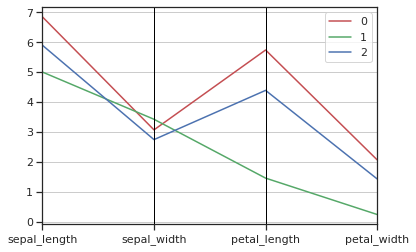

In [ ]:
#MENARIK KESIMPULAN K-MEANS: INTERPRETASI

cols = ['sepal_length','sepal_width','petal_length','petal_width']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [ ]:
kmPP.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

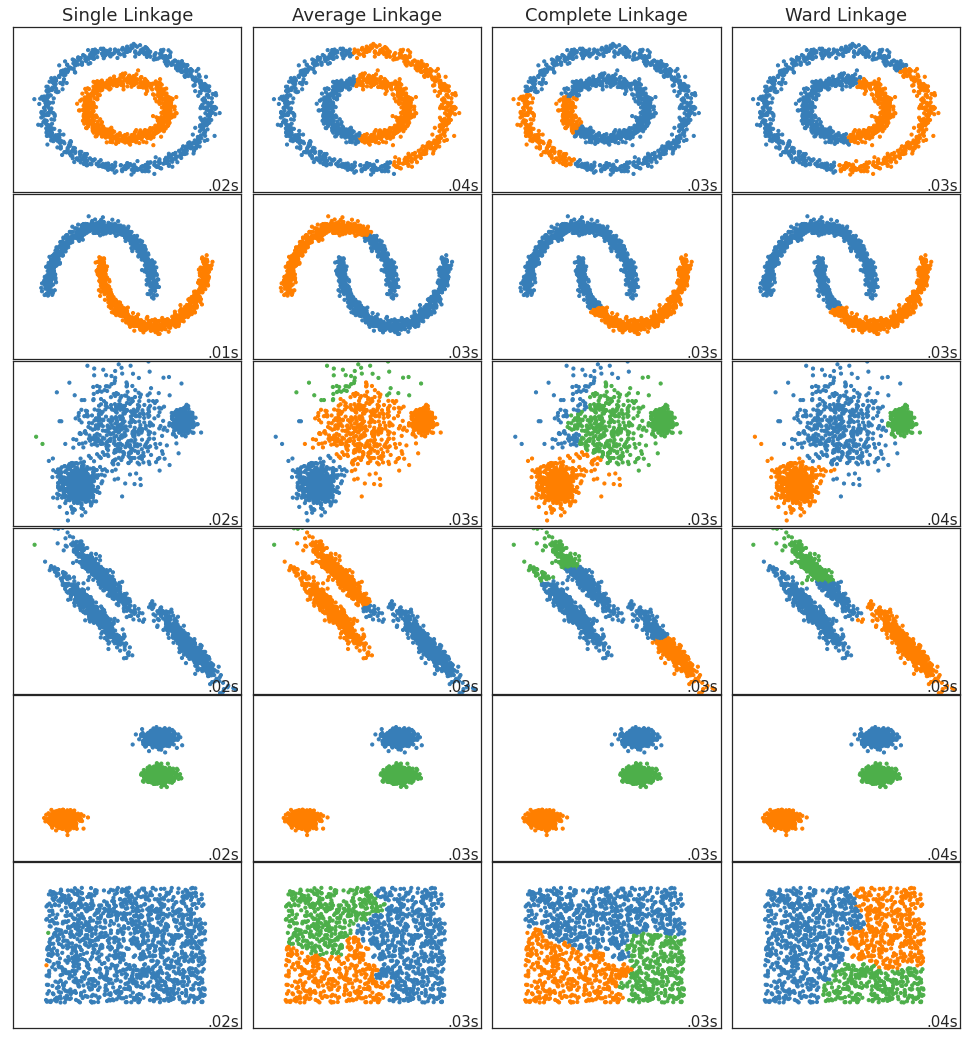

In [ ]:
#LINKAGES COMPARISON

tau.compare_linkages()

In [ ]:
#HIERIRCHAL AGGLOMERATIVE

hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

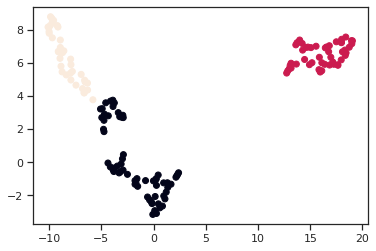

In [ ]:
#SCATTER PLOT HIERIRCHAL RESULT

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

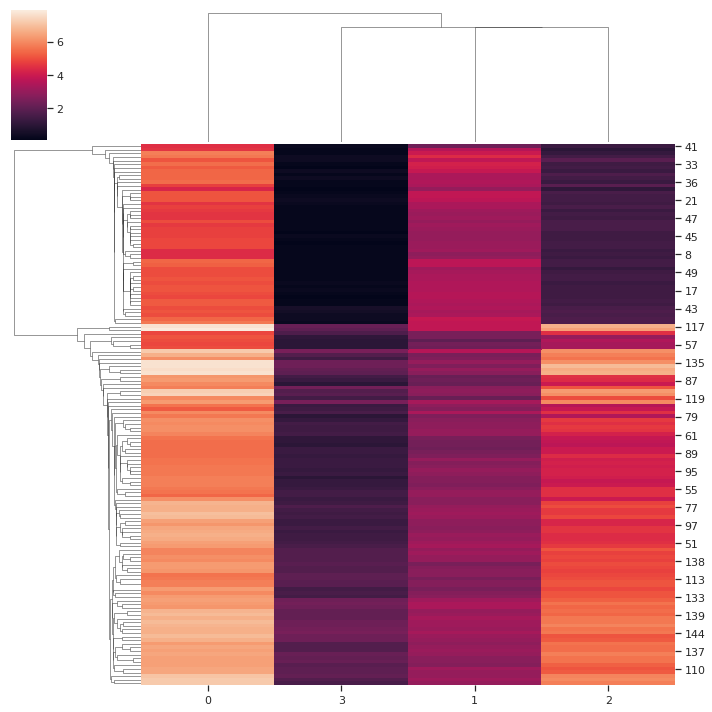

In [ ]:
#DENDOGRAM EXAMPLE

g = sns.clustermap(X, method="single", metric="euclidean")

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

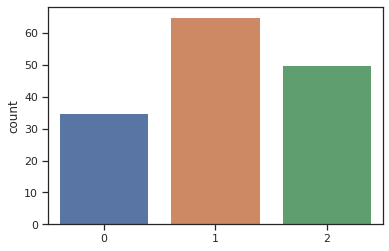

In [ ]:
#SPECTRAL

spectral = cluster.SpectralClustering(n_clusters=3)
spectral.fit(X)
C_spec = spectral.labels_.astype(np.int)
sns.countplot(C_spec)
C_spec[:10]

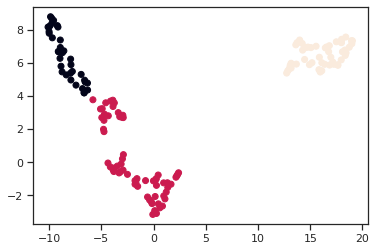

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_spec)
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

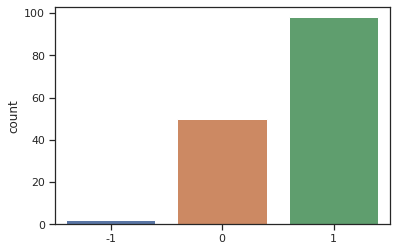

In [ ]:
#DBSCAN

dbscan = cluster.DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(np.int)
sns.countplot(C_db)
C_db[:10]

In [ ]:
sum([1 for i in C_db if i==-1])

2

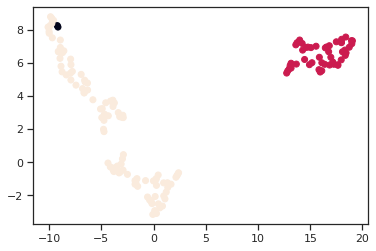

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_db)
plt.show()